# Ficititious Play

This note demonstrates how to use `fictplay` Python library.

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import fictplay

Fictitious play is first introduced as a learning model by Brown(1951) and Robinson(1951). In fictitious play model, players choose their strategies to maximize their payoffs with the beliefs such that their opponents will play each strategy with the probability equal to its historical frequency. In this note, we focus on two-player game.

## Model

- $i = 1, 2$ : players
- $S_i$ : the finite set of pure-strategies for player $i$
    - $S = S_1 \times S_2$ : the set of pure-strategy profile
    - $s_i \in S_i$ : one of the $i$'s strategy
- $\Sigma_i$ : the set of mixed-strategies for player $i$
    - $\Sigma = \Sigma_1 \times \Sigma_2$ : the set of mixed-strategy profile
    - $\sigma_i \in \Sigma_i$ : one of the $i$'s mixed strategy
- $u_i(s_i, \sigma_{-i})$ : $i$'s expected utility if he chooses pure strategy $s_i$ and his opponents act according to $\sigma_{-i}$

After each round of play, players observe the actual actions choosen by opponents, and they choose strategies in the next round given histories of opponents actions. When a player choose a mixed strategy, its mixing is not observed, that is, histories of play consist of pure-strategy profiles.

- $t = 1, 2, \cdots$: dates
- $s^{\tau} \in S$ : strategy profile at date $\tau$
- $\zeta^t = (s^1, \cdots, s^{t-1})$ : history of play up to $t$
    - $\zeta^1$ indicates null history
- $\mathcal{Z}^t$ : the set of all histories of play up to $t$
    - by construction, $\mathcal{Z}^1$ is the singleton set consisting of the null history
    - $\mathcal{Z}$ : the set of all possible infinite histories
- $\kappa(\zeta^t)(s_i)$ : the number of times that $i$ played $s_i$ in the $t-1$ observations that comprise $\zeta^t$
    - player $i$ has an exogenous initial weight function $\kappa_i(\zeta^1) : S_{-i} \rightarrow \mathcal{R}_+$

Weight function is updated by adding 1 to the weight of each opponent strategy each time it is played so that:

\begin{equation}
\kappa_i(\zeta^t)(s_{-i}) = \kappa_i(\zeta^{t-1})(s_{-i}) + \left\{ \begin{array}{ll}
    1 & (s_{-i}^{t-1} = s_{-i}) \\
    0 & (s_{-i}^{t-1} \neq s_{-i})
  \end{array} \right.
\end{equation}

Each player assesses concerning the behavior of his opponents at each date and contingent on history

- $\mu_i^t : \mathcal{Z}^t \rightarrow \Sigma_{-i}$ : $i$'s assessment over the possible pure-strategy profiles that hisopponents will choose at date $t$

Then, $\mu_i$ is given by normalizing the $\kappa_i$, that is,

\begin{equation}
\mu_i^t (\zeta^t)(s_{-i}) = \frac{\kappa_i (\zeta^t)(s_{-i})}{\sum_{\tilde{s}_{-i} \in S_{-i}}\kappa_i (\zeta^t)(\tilde{s}_{-i})}
\end{equation}

Each player takes best response, which is a maximizer of 
\begin{equation}
\sum_{s_{-i} \in S_{-i}} u_i(\sigma_i, s_{-i}) \mu_i^t (\zeta^t)(s_{-i})
\end{equation}
over all $\sigma_i \in \Sigma_i$

It is well known that if fictitious play converges to some distribution, those possibilities correspond to Nash equilibrium. However, fictitious play does not always converge. It converges for a two-player game when, for example

- Both players have finite strategies and the game is a zero-sum game
- The game is a potential game
- The game is solvable by IESDS

## `FictitiousPlay` class

The `FictitiousPlay` class requires **payoff matrix**, which must be either 2-dimentional numpy array or `NormalFormGame` object.

`FictitiousPlay` class in `fictplay` module adopts **weighted fictitious play** , where weight function is updated with some weights on played actions. In this class, weight function is updated as follows:

\begin{equation}
\kappa_i(\zeta^{t+1})(s_{-i}) = \kappa_i(\zeta^{t})(s_{-i}) + \left\{ \begin{array}{ll}
    1/t & (s_{-i}^{t} = s_{-i}) \\
    0 & (s_{-i}^{t} \neq s_{-i})
  \end{array} \right.
\end{equation}

that is, actions which are played in the early periods have more weights in players' beliefs.

### Creating `FictitiousPlay` class

Let's create the `FictitiousPlay` class with the following **matching pennies** payoff matrix

1$\backslash$2 | $A$           | $B$ 
 ------------- |---------------| ---------
 $A$           | 1, -1          |    -1, 1   
 $B$           | -1, 1          |   1, -1     

In [2]:
matching_pennies = [[( 1, -1), (-1,  1)],
                    [(-1,  1), ( 1, -1)]]
fp0 = fictplay.FictitiousPlay(matching_pennies)

`N` attribute returns the number of players in this game

In [3]:
fp0.N

2

`players` attribute returns the tuple of `Player` instances of this game

In [4]:
fp0.players

(Player in a 2-player normal form game, Player in a 2-player normal form game)

`nums_actions` attribute returns the tuple of the number of actions for each player

In [5]:
fp0.nums_actions

(2, 2)

### Initializing `current_actions` and `current_beliefs`

Initially, `current_actions` is zero vector

In [6]:
fp0.current_actions

array([0, 0])

`current_actions` consists of random numbers

In [7]:
fp0.current_beliefs

(array([ 2.31584178e+077, -1.49458033e-154]),
 array([2.31584178e+77, 1.73060579e-77]))

To initialize `current_actions`, we can use `set_init_actions` method.

In [8]:
init_actions = [1,0]
fp0.set_init_actions(init_actions)

In [9]:
fp0.current_actions

array([1, 0])

When you initialize the `current_actions`, you simultaneously initialize `current_beliefs`

In [10]:
fp0.current_beliefs

(array([1., 0.]), array([0., 1.]))

If `init_actions` is None, `set_init_actions` method randomly sets the `current_actions` and `current_beliefs`

In [11]:
fp0.set_init_actions(init_actions=None)

In [12]:
fp0.current_actions

array([0, 1])

In [13]:
fp0.current_beliefs

(array([0., 1.]), array([1., 0.]))

## Simulations

### Two-Action Games

Consider the fictitious play model with **matching pennies** game defined above.

In [14]:
matching_pennies = [[( 1, -1), (-1,  1)],
                    [(-1,  1), ( 1, -1)]]
mp = fictplay.FictitiousPlay(matching_pennies)

Let's simulate how players' beliefs converge to some distribution. 

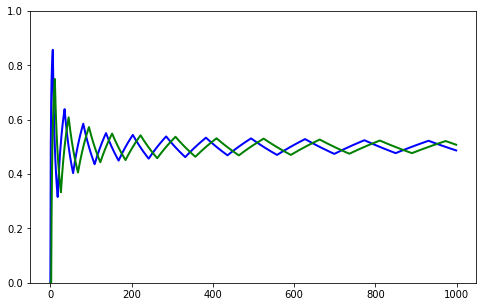

In [15]:
ts_length = 1000
belief_sequences = mp.simulate(ts_length)

fig, ax = plt.subplots(figsize=(8, 5))
ax.set_prop_cycle('color', ['b', 'g'])
for belief_sequence in belief_sequences:
    ax.plot(belief_sequence[:, 1], linewidth=2)
ax.set_ylim(0, 1)
plt.show()

Horizontal and vertical axis correspond to the period and the player's belief for his opponent's first action. Blue(Green) line represents first(second) player's belief.

As shown in the above graph, both players' beliefs converge to $0.5$, which is the mixed-strategy Nash equilibrium of the original game.

### Three-Action Games

Next, let's consider the fictitious play model  with 3 actions.

First, define the function for drawing the graph.

In [16]:
def customize_ax(ax):
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_zlim(0, 1)
    ax.set_xticks((0, 0.25, 0.5, 0.75, 1))
    ax.set_yticks((0.25, 0.5, 0.75))
    ax.set_zticks((0, 0.25, 0.5, 0.75, 1))
    ax.set_aspect('equal')
    ax.view_init(ax.elev, 45)
    
def plot3d(belief_sequences, mult_subplots=False, figsize=(12, 7.5)):
    player_ind = [0, 1]
    fig = plt.figure(figsize=figsize)
    colors = ['b', 'r']
    
    if mult_subplots:
        axes = [fig.add_subplot(1, 2, i+1, projection='3d') for i in player_ind]
    else:
        axes = [fig.add_subplot(111, projection='3d')] * 2
    
    for i, color in zip(player_ind, colors):
        axes[i].scatter(belief_sequences[i][:, 0],
                        belief_sequences[i][:, 1],
                        belief_sequences[i][:, 2],
                        c=color, s=60)
        customize_ax(axes[i])

    plt.show()

Consider the fictitious play model of **shapley game** whose payoff matrix is

1$\backslash$2 | $A$           | $B$    |$C$
 ------------- |---------------| ---------|-----------
 $A$           | 0, 0          |    1, 0   |   0,1
 $B$           | 0, 1          |   0, 0   |    1,0
 $C$           |1,0           | 0,1      | 0,0

In [17]:
shapley_game = [[(0, 0), (1, 0), (0, 1)],
                [(0, 1), (0, 0), (1, 0)],
                [(1, 0), (0, 1), (0, 0)]]
sg = fictplay.FictitiousPlay(shapley_game)

In [18]:
sg.players

(Player in a 2-player normal form game, Player in a 2-player normal form game)

In [19]:
sg.nums_actions

(3, 3)

Let's simulate the convergence of players' beliefs in this model.

In [20]:
ts_length = 1000
belief_sequences = sg.simulate(ts_length, init_actions=(0, 1))

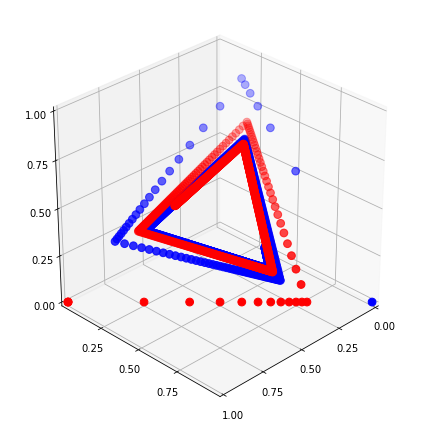

In [21]:
plot3d((belief_sequences[0][0:], belief_sequences[1][0:]))

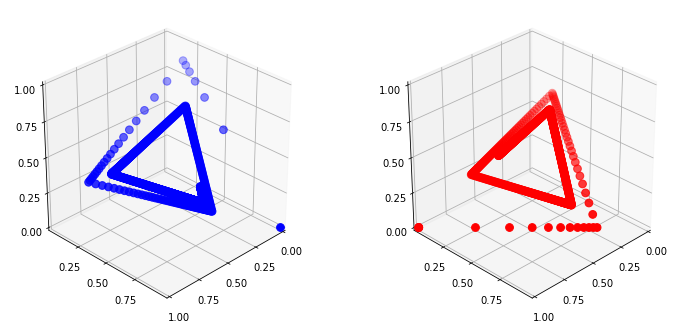

In [22]:
plot3d((belief_sequences[0][0:], belief_sequences[1][0:]), mult_subplots=True)

X-axis(bottom right), y-axis(bottom left) and z-axis(vertical axis) correspond to player's belief for opponent's first, second third action respectively.
Blue(Red) points represent first(second) player's belief at each period for opponent's action.

Shapley(1964) showed that in the normal fictitious play (not weighted fictitious play) if $(A, B)$ is choosen in the first period, then players' beliefs do not converge. In addition, the fictitious play follows the cycle $(A, B) \rightarrow (A, C) \rightarrow (B, C) \rightarrow (B,A) \rightarrow (C,A) \rightarrow (C, B) \rightarrow (A, B) \rightarrow \cdots$

---

# Stochastic Fictitious Play

Stochastic fictitious play is first introduced by Fundenberg and Kreps(1993). In this model, each player's payoff is perturbed in each period by a random shock.

## Model

Almost all of the settings are same as original fictitious play model except for paerturbated payoff. Player's payoff at period $t$ is given by 

\begin{equation}
u_i^t (s_i^t, s_{-i}^t) + \eta_i(s_i^t)
\end{equation}

The random payoff shock $\eta_i$ is observable for each $i$, but player $i$ cannot observe opponents' payoff shock and its history. Let $\rho_i$ denote the probability distribution of each $\eta_i$ and $E_i$ denote the support of $\rho_i$.

In each period, players choose their strategy after observing payoff shock, so in the stage game strategy for each player is a mapping form $E_i$ to $S_i$. Note that we do not need to consider mixed startegies in this augmented game.

Fundenberg and Kreps(1993) showed that in any $2 \times 2$ game that has a unique completely mixed Nash equilibrium, stochastic fictitious play converges with pobability 1 with some assumptions.

In adddition, Hofbauer and Sandholm (2002) showed that in (i) two-player symmetric game with an interior ESS (ii) two-player zero sum game, and some game classes, stochastic fictitious play converges.

## `StochasticFictitiousPlay` class

`fictplay` module also provides `StochasticFictitiousPlay` class. In this class, each payoff shock follows same distribution, **gumbel distribution** or **standard normal distribution**, that is, $\eta_i(\cdot) \sim Gumbel(\mu, \beta)$ or $\eta_i(\cdot) \sim N(0, 1)$ for all $i$. $\eta_i(s_i)$ ($i = 1,2$, $s_i \in S_i$) are independent and identically distributed.

## Simulations

### Two-Action Game

In [23]:
mp_s = fictplay.StochasticFictitiousPlay(matching_pennies)

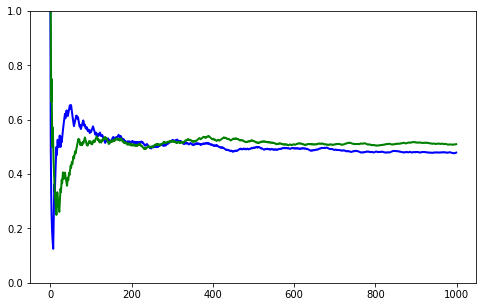

In [24]:
ts_length = 1000
belief_sequences = mp_s.simulate(ts_length)

fig, ax = plt.subplots(figsize=(8, 5))
ax.set_prop_cycle('color', ['b', 'g'])
for belief_sequence in belief_sequences:
    ax.plot(belief_sequence[:, 1], linewidth=2)
ax.set_ylim(0, 1)
plt.show()

As shown in the above graph, both players' beliefs converge to  $0.5$ , which is the mixed-strategy Nash equilibrium of the original game.

### Three-Action Game

In [25]:
sg_s = fictplay.StochasticFictitiousPlay(shapley_game)

In [26]:
ts_length = 1000
belief_sequences = sg_s.simulate(ts_length, init_actions=(1, 0))

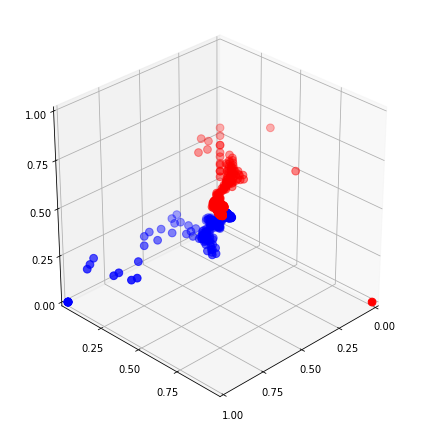

In [27]:
plot3d((belief_sequences[0][0:], belief_sequences[1][0:]))

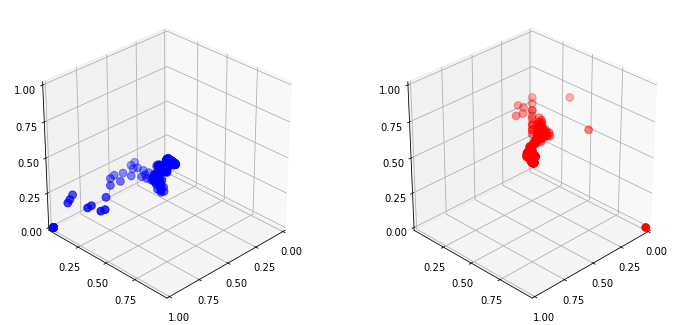

In [28]:
plot3d((belief_sequences[0][0:], belief_sequences[1][0:]), mult_subplots=True)

Stochastic fictitious play converges to $(1/3, 1/3, 1/3)$ which is a mixed Nash equilibrium of this game. This  is consistent with the result of Hofbauer and Sandholm (2002) since $(1/3, 1/3, 1/3)$ is an interior ESS and a unique equilibrium.

---

# Reference

- Brown, G. W. 1951. Iterative solutions of games by fictitious play. In Activity Analysis of Production and Allocation, ed. by T.C.Koopmans. New York: Wiley.
- Robinson, J. 1951. An iterative method of solving a game. Annals of Mathmatics 54: 296-301.
- Shapley, L. 1964. Some topics in two-person games. In Advances in Game Theory, ed. by M. Drescher, L. S. Shapley, and A. W. Tucker. Princeton: Princeton University Press.
- Fudenberg, D., and D. Kreps. 1993. Learning mixed equilibria. Games and Economic Behavior 5: 320-67.
- Fudenberg, D., and D.K. Levine. 1998. The Theory of Learning in Games Cambridge: MIT Press.
- Hofbauer, J., and W. H. Sandholm. 2002. On the Global Convergence of Stochastic Fictitious Play. Econometrica Vol.70, No. 6: 2265-2294